In [93]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
#from us import states


In [94]:
#Read in CSVs
combined_fips_df = pd.read_csv("NOAA_CSVs/combined_zone_county_data.csv")
wildfire_df = pd.read_csv("NOAA_CSVs/wildfires_2010_2019.csv")
#census_df = pd.read_csv("census_data_ca_county.csv")
census_df_2010 = pd.read_csv("Census_csvs/2010_census_data_ca_county.csv")
#census_df_2011 = pd.read_csv("Census_csvs/2011_census_data_ca_county.csv")
#census_df_2012 = pd.read_csv("Census_csvs/2012_census_data_ca_county.csv")
census_df_2013 = pd.read_csv("Census_csvs/2013_census_data_ca_county.csv")
#census_df_2014 = pd.read_csv("Census_csvs/2014_census_data_ca_county.csv")
#census_df_2015 = pd.read_csv("Census_csvs/2015_census_data_ca_county.csv")
census_df_2016 = pd.read_csv("Census_csvs/2016_census_data_ca_county.csv")
#census_df_2017 = pd.read_csv("Census_csvs/2017_census_data_ca_county.csv")
#census_df_2018 = pd.read_csv("Census_csvs/2018_census_data_ca_county.csv")
census_df_2019 = pd.read_csv("Census_csvs/2019_census_data_ca_county.csv")

In [95]:
combined_fips_df

,NOAA_FIP,NOAA_Zone,County,FIP,Latitude,Longitude,Zone,Begin_Date
0,6,San Francisco,San Francisco,75.0,37.7558,-122.4423,NaN,NaN
1,13,Shasta Lake Area / Northern Shasta County,Shasta,89.0,40.9299,-122.2247,SHASTA LAKE/NORTH SHASTA COUNTY (ZONE),08/01/2018
2,13,Shasta Lake Area / Northern Shasta County,Shasta,89.0,40.9299,-122.2247,SHASTA LAKE/NORTH SHASTA COUNTY (ZONE),09/05/2018
3,14,Burney Basin / Eastern Shasta County,Shasta,89.0,40.9423,-121.4882,BURNEY BASIN/EASTERN SHASTA COUNTY (ZONE),08/02/2014
4,15,Northern Sacramento Valley,Shasta,89.0,40.2198,-122.2949,NORTHERN SACRAMENTO VALLEY (ZONE),09/09/2013
...,...,...,...,...,...,...,...,...
756,64,NaN,NaN,NaN,NaN,NaN,CLEAR LAKE/SOUTHERN LAKE COUNTY (ZONE),08/09/2015
757,64,NaN,NaN,NaN,NaN,NaN,CLEAR LAKE/SOUTHERN LAKE COUNTY (ZONE),09/12/2015
758,64,NaN,NaN,NaN,NaN,NaN,CLEAR LAKE/SOUTHERN LAKE COUNTY (ZONE),08/13/2016
759,64,NaN,NaN,NaN,NaN,NaN,CLEAR LAKE/SOUTHERN LAKE COUNTY (ZONE),10/08/2017


In [96]:
wildfire_count = combined_fips_df['FIP'].value_counts()
wildfire_count_df = pd.DataFrame(wildfire_count)
wildfire_count_df = wildfire_count_df.head(15)
wildfire_count_df.reset_index(inplace=True)
wildfire_count_df = wildfire_count_df.rename(columns={"FIP": "Number of Wildfires", "index" : "FIP"})
wildfire_count_df

,FIP,Number of Wildfires
0,71.0,53
1,65.0,51
2,93.0,41
3,73.0,31
4,37.0,23
5,49.0,20
6,57.0,19
7,111.0,19
8,115.0,18
9,61.0,17


In [97]:
#Creating New DataFrame
combined_fips_df.drop(['NOAA_FIP', 'NOAA_Zone', 'Zone', 'Begin_Date', 'Latitude', 'Longitude'], axis=1, inplace=True)
cleaned_combined_fips = pd.DataFrame(combined_fips_df)
cleaned_combined_fips

,County,FIP
0,San Francisco,75.0
1,Shasta,89.0
2,Shasta,89.0
3,Shasta,89.0
4,Shasta,89.0
...,...,...
756,NaN,NaN
757,NaN,NaN
758,NaN,NaN
759,NaN,NaN


In [98]:
merged_wildfire_df = pd.merge(wildfire_count_df, cleaned_combined_fips, on="FIP", how="left")
merged_wildfire_df

,FIP,Number of Wildfires,County
0,71.0,53,San Bernardino
1,71.0,53,San Bernardino
2,71.0,53,San Bernardino
3,71.0,53,San Bernardino
4,71.0,53,San Bernardino
...,...,...,...
367,109.0,15,Tuolumne
368,109.0,15,Tuolumne
369,109.0,15,Tuolumne
370,109.0,15,Tuolumne


In [99]:
merged_wildfire_df.drop_duplicates(inplace=True)
cleaned_merged_df = pd.DataFrame(merged_wildfire_df)

In [100]:
cleaned_merged_df.rename(columns = {"County" : "County Name", "FIP" : "County FIP"}, inplace=True)
cleaned_merged_df

,County FIP,Number of Wildfires,County Name
0,71.0,53,San Bernardino
53,65.0,51,Riverside
104,93.0,41,Siskiyou
145,73.0,31,San Diego
176,37.0,23,Los Angeles
199,49.0,20,Modoc
219,57.0,19,Nevada
238,111.0,19,Ventura
257,115.0,18,Yuba
275,61.0,17,Placer


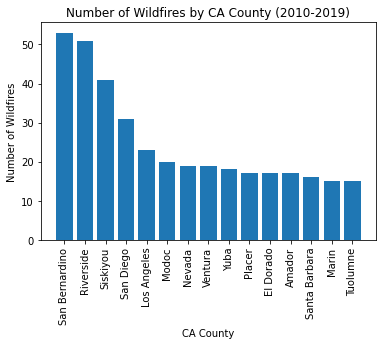

In [101]:
#Wildfire Bar Graph
plt.bar((cleaned_merged_df['County Name']), (cleaned_merged_df['Number of Wildfires']))
plt.title("Number of Wildfires by CA County (2010-2019)")
plt.xlabel("CA County")
plt.xticks(rotation = 90)
plt.ylabel("Number of Wildfires")
plt.show()

In [104]:
#Renaming Poverty Rate Columns 
census_df_2010.rename(columns = {"Poverty Rate" : "2010 Poverty Rate"}, inplace=True)
census_df_2013.rename(columns = {"Poverty Rate" : "2013 Poverty Rate"}, inplace=True)
census_df_2016.rename(columns = {"Poverty Rate" : "2016 Poverty Rate"}, inplace=True)
census_df_2019.rename(columns = {"Poverty Rate" : "2019 Poverty Rate"}, inplace=True)

In [105]:
#Cleaning data
census_df_2010.drop(["Population", "Poverty Count"], axis=1)
census_df_2013.drop(["Population", "Poverty Count"], axis=1)
census_df_2016.drop(["Population", "Poverty Count"], axis=1)
census_df_2019.drop(["Population", "Poverty Count"], axis=1)

,Name,2019 Poverty Rate,County
0,Alameda County,9.752866,1
1,Alpine County,19.730510,3
2,Amador County,8.980197,5
3,Butte County,18.587617,7
4,Calaveras County,11.308608,9
5,Colusa County,12.929990,11
6,Contra Costa County,8.631641,13
7,Del Norte County,17.312239,15
8,El Dorado County,8.295901,17
9,Fresno County,22.168547,19


In [106]:
#Reorganizing columns
census_df_2010 = census_df_2010[["Name", "County", "2010 Poverty Rate"]]
census_df_2013 = census_df_2013[["Name", "County", "2013 Poverty Rate"]]
census_df_2016 = census_df_2016[["Name", "County", "2016 Poverty Rate"]]
census_df_2019 = census_df_2019[["Name", "County", "2019 Poverty Rate"]]

In [107]:
#Merging census dataframes, dropping repeat names, reorganizing 
pt1_census_df = pd.merge(census_df_2010, census_df_2013, on="County", how="left")
pt1_census_df.drop(["Name_y"], axis=1, inplace=True)
pt2_census_df = pd.merge(pt1_census_df, census_df_2016, on="County", how="left")
pt2_census_df.drop(["Name_x"], axis=1, inplace=True)
census_df = pd.merge(pt2_census_df, census_df_2019, on="County", how="left")
census_df.drop(["Name_x"], axis=1, inplace=True)
census_df = census_df[["Name_y", "County", "2010 Poverty Rate", "2013 Poverty Rate", "2016 Poverty Rate", "2019 Poverty Rate"]]
census_df.rename(columns = {"Name_y" : "County Name", "County" : "County FIP"}, inplace=True)
census_df

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate
0,Alameda County,1,11.192100,12.278212,11.810864,9.752866
1,Alpine County,3,12.329932,15.793991,18.665541,19.730510
2,Amador County,5,7.096825,11.089733,9.966723,8.980197
3,Butte County,7,17.970590,19.924550,20.750680,18.587617
4,Calaveras County,9,8.203244,10.740470,12.595173,11.308608
5,Colusa County,11,14.679896,12.332678,13.384205,12.929990
6,Contra Costa County,13,8.893560,10.431003,10.101947,8.631641
7,Del Norte County,15,19.409223,19.064076,18.890256,17.312239
8,El Dorado County,17,7.820589,8.954482,9.748087,8.295901
9,Fresno County,19,22.038005,25.498374,26.462062,22.168547


In [108]:
#DataFrame for Counties with Highest 2010 Poverty Rates
census_df2 = census_df.sort_values(by=["2010 Poverty Rate"], ascending=False)
census_df3 = census_df2.head(15)
census_df3['Number of Wildfires'] = [5, 8, 3, 7, 12, 10, 2, 18, 0, 5, 8, 20, 8, 4, 5]
census_df3 

C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires
53,Tulare County,107,22.592244,25.817653,27.893516,23.492633,5
9,Fresno County,19,22.038005,25.498374,26.462062,22.168547,8
23,Merced County,47,21.435267,24.927814,23.645571,20.715081,3
12,Imperial County,25,20.103301,21.852615,22.679202,22.744755,7
51,Tehama County,103,19.811426,19.403551,21.206062,21.795594,12
14,Kern County,29,19.611177,22.024301,22.305262,20.276215,10
7,Del Norte County,15,19.409223,19.064076,18.890256,17.312239,2
57,Yuba County,115,19.336706,21.208697,20.406782,15.154531,18
16,Lake County,33,18.777089,24.680984,24.285224,18.308279,0
19,Madera County,39,18.042751,21.530029,20.893158,18.833195,5


In [109]:
#DataFrame for Counties with Highest Number of Wildfires
#Creating combined dataframe in a weird/labor intensive way
df1 = census_df.loc[census_df["County FIP"] == 71.0, :]
df2 = census_df.loc[census_df["County FIP"] == 65.0, :]
df3 = census_df.loc[census_df["County FIP"] == 93.0, :]
df4 = census_df.loc[census_df["County FIP"] == 73.0, :]
df5 = census_df.loc[census_df["County FIP"] == 37.0, :]
df6 = census_df.loc[census_df["County FIP"] == 49.0, :]
df7 = census_df.loc[census_df["County FIP"] == 57.0, :]
df8 = census_df.loc[census_df["County FIP"] == 111.0, :]
df9 = census_df.loc[census_df["County FIP"] == 115.0, :]
df10 = census_df.loc[census_df["County FIP"] == 61.0, :]
df11 = census_df.loc[census_df["County FIP"] == 17.0, :]
df12 = census_df.loc[census_df["County FIP"] == 5.0, :]
df13 = census_df.loc[census_df["County FIP"] == 83.0, :]
df14 = census_df.loc[census_df["County FIP"] == 41.0, :]
df15 = census_df.loc[census_df["County FIP"] == 109.0, :]
combined_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)
combined_data['Number of Wildfires'] = [53, 51, 41, 31, 23, 20, 19, 19, 18, 17, 17, 17, 16, 15, 15]
combined_data

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires
35,San Bernardino County,71,14.512636,18.244799,18.616080,15.523880,53
32,Riverside County,65,13.195674,15.952728,16.209402,13.489000,51
46,Siskiyou County,93,16.753189,20.708716,21.810021,18.638999,41
36,San Diego County,73,11.952087,14.072999,13.648184,11.302134,31
18,Los Angeles County,37,15.459914,17.559280,17.540557,14.684677,23
24,Modoc County,49,17.792816,20.247148,16.417580,18.165488,20
28,Nevada County,57,8.901473,11.873027,11.998297,10.926605,19
55,Ventura County,111,9.126662,10.913045,10.495190,8.810133,19
57,Yuba County,115,19.336706,21.208697,20.406782,15.154531,18
30,Placer County,61,6.565085,8.667581,8.616972,7.674988,17


In [110]:
#Merging Census and Wildfire DataFrames
#census_wildfire_merge_df = pd.merge(census_df, cleaned_merged_df, on="County Name", how="outer")

#Dropping/renaming columns
#census_wildfire_merge_df.drop(["County FIP_y"], axis=1, inplace=True)
#census_wildfire_merge_df.rename(columns = {"County FIP_x" : "County FIP"}, inplace=True)
#census_wildfire_merge_df

In [111]:
new_census_2010 = census_df_2010.sort_values(by=['2010 Poverty Rate'], ascending=False).head(10)
plt.bar((new_census_2010['County']), (new_census_2010['Poverty Rate']))
plt.title("2010 CA Counties with Highest Poverty Rates")
plt.xlabel("CA County (by FIP)")
plt.xticks(rotation = 90)
plt.ylabel("Poverty Rate (% of Population)")
plt.show()

KeyError: 'Poverty Rate'

In [112]:
#census_df_2010.sort_values(by=['Poverty Rate'], ascending=False).head(10)

new_census_2010 = census_df_2010.sort_values(by=['Poverty Rate'], ascending=False).head(10)
plt.bar((new_census_2010['Name']), (new_census_2010['Poverty Rate']))
plt.title("2010 CA Counties with Highest Poverty Rates")
plt.xlabel("CA County")
plt.xticks(rotation = 90)
plt.ylabel("Poverty Rate (% of Population)")
plt.show()

KeyError: 'Poverty Rate'

In [ ]:
wildfire_df.drop(['ABSOLUTE_ROWNUMBER', 'BEGIN_AZIMUTH', 'BEGIN_LAT', 'BEGIN_LOCATION', 'BEGIN_LON', 'BEGIN_RANGE', 'BEGIN_TIME',
               'CZ_TIMEZONE', 'CZ_TYPE', 'DAMAGE_CROPS_NUM', 'DAMAGE_PROPERTY_NUM', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 
                'END_AZIMUTH', 'END_LAT', 'END_LOCATION', 'END_LON', 'END_RANGE', 'EPISODE_ID', 'EVENT_ID', 'EVENT_TYPE', 
                'FLOOD_CAUSE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'TOR_LENGTH', 'TOR_WIDTH',
               'TOR_F_SCALE', 'STATE_ABBR', 'WFO', 'SOURCE', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE'], axis=1, inplace=True)

In [ ]:
wildfire_df.rename(columns = {"BEGIN_DATE": "Begin Date", "CZ_FIPS" : "County", "CZ_NAME_STR" : "Name"}, inplace=True)

In [80]:
wildfire_county_counts = wildfire_df['Name'].value_counts()
wildfire_county_counts = wildfire_county_counts.head(15)
wildfire_county_counts

KeyError: 'Name'

In [79]:
wildfire_county_counts.plot(kind='bar')
plt.title("CA Zones with Highest Number of Wildfires Between 2010-2019")
plt.xlabel("CA Zones")
plt.ylabel("Number of Wildfires")
plt.show()


NameError: name 'wildfire_county_counts' is not defined